Shubhasmita Roy
# Exp 8: CNN using MNIST dataset

## Loading dataset

In [1]:
from keras.datasets import mnist

In [2]:
(x_train, y_train),(x_test, y_test)=mnist.load_data()

## Visualizing dataset

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
print("x_train.shape",x_train.shape)
print("y_train.shape",y_train.shape)
print("x_test.shape",x_test.shape)

x_train.shape (60000, 28, 28)
y_train.shape (60000,)
x_test.shape (10000, 28, 28)


## Plotting 1 sample from dataset

In [5]:
single_image = x_train[10]
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118,
        219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254,
        254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [6]:
single_image.shape

(28, 28)

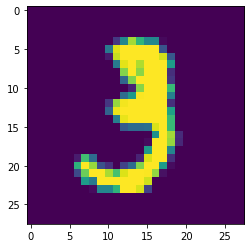

In [7]:
plt.imshow(single_image)

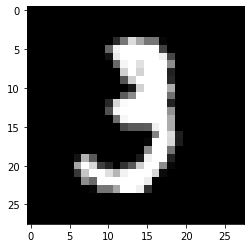

In [8]:
plt.imshow(single_image, cmap ='gray')

## Preprocessing

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [11]:
from keras.utils.np_utils import to_categorical

In [12]:
y_train.shape

(60000,)

In [13]:
y_example=to_categorical(y_train)
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [14]:
y_example.shape

(60000, 10)

In [15]:
print(y_example[0])
print(y_example[10])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [16]:
y_cat_test = to_categorical(y_test, 10)

In [17]:
y_cat_train = to_categorical(y_train, 10)

## Preprocessing X data

In [18]:
# Normalization
x_train = x_train/255
x_test = x_test/255

In [19]:
scaled_single = x_train[0]
scaled_single.max()

1.0

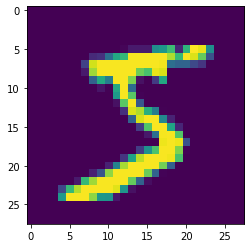

In [20]:
plt.imshow(scaled_single)

## Reshaping Data

In [21]:
x_train.shape

(60000, 28, 28)

In [22]:
x_test.shape

(10000, 28, 28)

In [23]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_train.shape

(60000, 28, 28, 1)

In [24]:
x_test = x_test.reshape(10000, 28, 28, 1)
x_test.shape

(10000, 28, 28, 1)

# Training the model

In [25]:
from keras.models import Sequential
from keras. layers import Dense, Conv2D, MaxPool2D, Flatten

In [26]:
model = Sequential()

#CONVOLUTIONAL LAYER
#number of filters is 32, each of size 4x4, input imag shape 28x28x1 as gray image, activation function is relu 
model.add(Conv2D(filters=32, kernel_size = (4, 4) , input_shape=(28, 28, 1), activation='relu',))

#POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

#FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER # Flatten converts 2D images to 1D as we need 1d Last Layer where there are 10 neurons representing 10 categories 
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS) 
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES 
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop', 
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(x_train, y_cat_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 31s 9ms/step - loss: 0.2802 - accuracy: 0.9150
Epoch 2/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0520 - accuracy: 0.9851
Epoch 3/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0331 - accuracy: 0.9900


# Evaluating the model

In [29]:
model.metrics_names

['loss', 'accuracy']

In [30]:
#performance of model with the test data model.evaluate(x_test,y_cat_test)
from sklearn.metrics import classification_report
import numpy as np
#predictions = model.predict_classes(x_test)
predictions=np.argmax(model.predict(x_test), axis=1)
#predictions by predict_classes is decimal encoded and not one hot encoded
#therfore compare predictions with y_test and not with y_cat_test for classification report

In [31]:
y_cat_test.shape

(10000, 10)

In [32]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

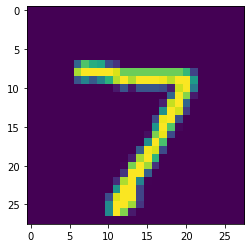

In [33]:
plt.imshow(x_test[0])

In [34]:
predictions[0]

7

In [35]:
y_test[0]

7

In [36]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [37]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## Confusion matrix

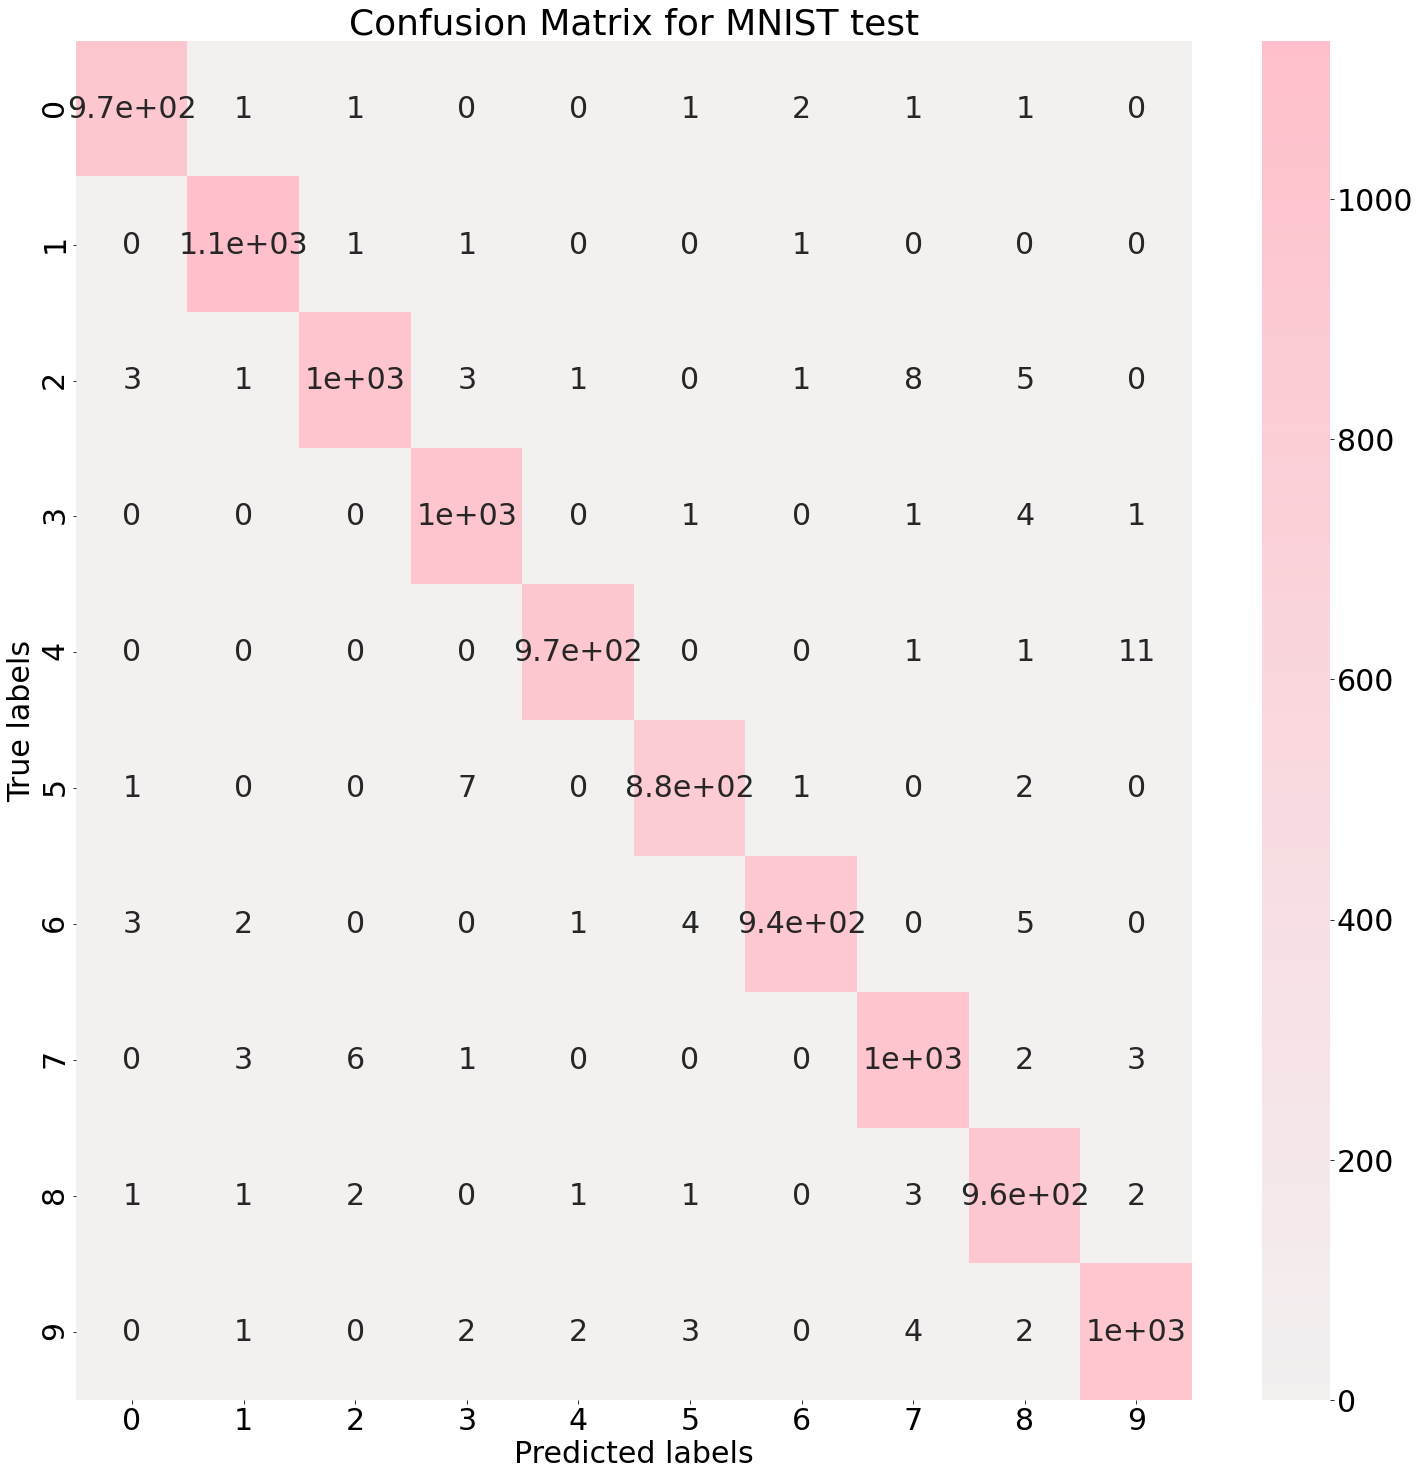

In [39]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

confusion_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=predictions)  # shape=(12, 12)

import seaborn as sns
import matplotlib.pyplot as plt     
cmap = sns.light_palette("pink", as_cmap=True)
    
ax= plt.subplot()
sns.heatmap(confusion_matrix, annot=True, cmap=cmap, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for MNIST test'); 
ax.xaxis.set_ticklabels(['0', '1', '2','3','4','5','6','7','8','9']); 
ax.yaxis.set_ticklabels(['0', '1', '2','3','4','5','6','7','8','9']);
plt.rcParams['figure.figsize'] = (25, 25)
plt.rc('font', size=30)